<a href="https://colab.research.google.com/github/iqbalamo93/kerasTF/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from tensorflow.keras.datasets  import mnist

In [4]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [0]:
Single_image = X_train[0]

In [7]:
Single_image.shape

(28, 28)

In [8]:
print(28*28)
Single_image

784


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

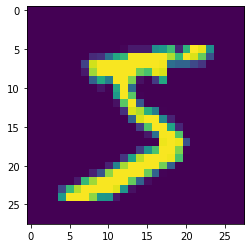

In [9]:


plt.imshow(Single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape,len(y_train)

((60000,), 60000)

In [0]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test)

In [0]:
y_cat_train = to_categorical(y_train)

In [0]:
X_train = X_train/255
X_test  = X_test/255

In [0]:
scaled_image= X_train[0]

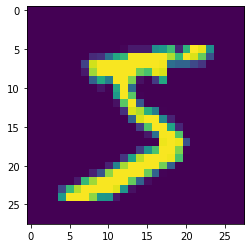

In [21]:
plt.imshow(scaled_image)

In [0]:
#batch_size,width,height,color_channel
X_train =X_train.reshape(60000,28,28,1)

In [0]:
X_test =X_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import  Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping


In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)


In [29]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1346 - accuracy: 0.9595 - val_loss: 0.0600 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0412 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0470 - val_accuracy: 0.9842


In [0]:
metrics = pd.DataFrame(model.history.history)

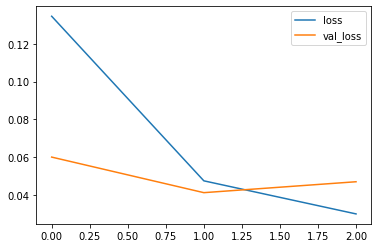

In [31]:
metrics[['loss','val_loss']].plot()

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.134595,0.959450,0.060026,0.9802
1,0.047457,0.985033,0.041194,0.9862
2,0.029941,0.990583,0.046974,0.9842


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [0]:
My_number =X_test[0]

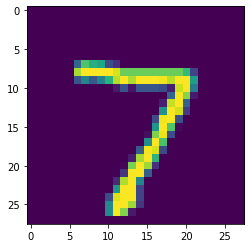

In [44]:
plt.imshow(My_number.reshape(28,28))

In [46]:
model.predict_classes(My_number.reshape(1,28,28,1))

array([7])

In [48]:
My_number.shape

(28, 28, 1)